# Logistic Regression

We will be using a Titanic dataset from Kaggle - https://www.kaggle.com/c/titanic , We'll be trying to predict a classification- survival or deceased.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
titanic = sns.load_dataset('titanic')

In [65]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class', ylabel='age'>

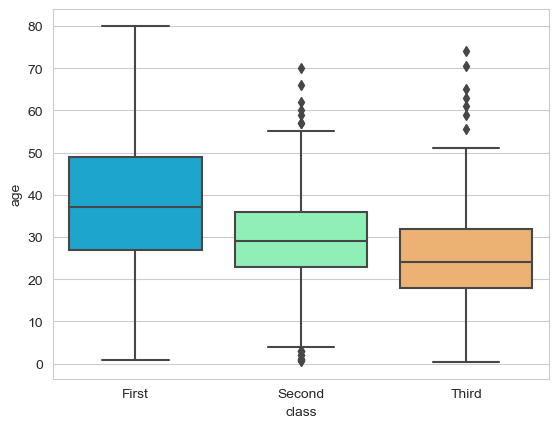

In [55]:
sns.boxplot(x='class', y='age', data = titanic, palette = 'rainbow')

C:\Users\Asmita shetty\AppData\Local\Temp\ipykernel_3804\3331474474.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')


<Axes: xlabel='class', ylabel='age'>

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


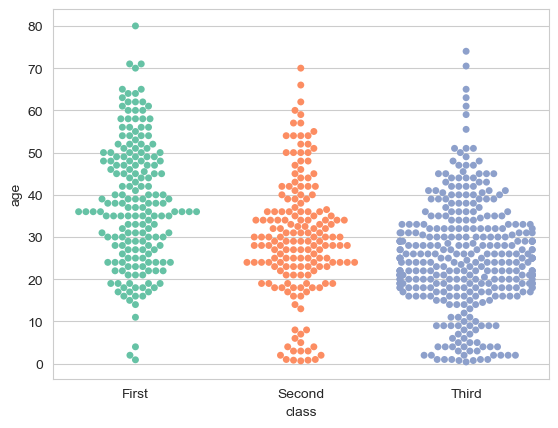

In [56]:
sns.swarmplot(x='class',y='age',data=titanic,palette='Set2')

<Axes: xlabel='sex', ylabel='count'>

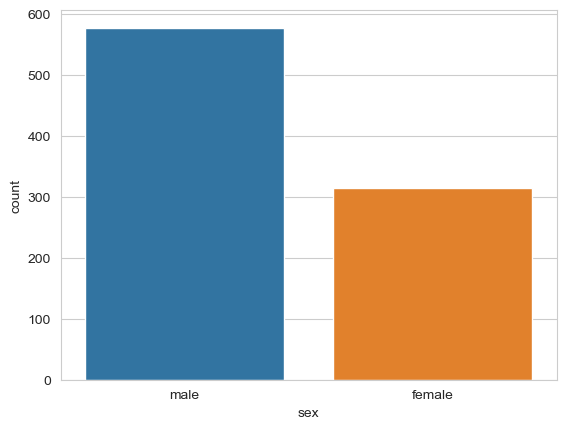

In [57]:
sns.countplot(x='sex', data = titanic)

C:\Users\Asmita shetty\AppData\Local\Temp\ipykernel_3804\1471800885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sns.heatmap(titanic.corr(), cmap = 'coolwarm')


Text(0.5, 1.0, 'correlation between features')

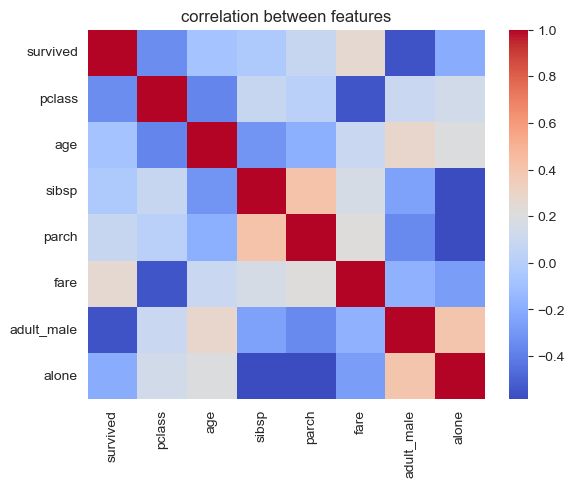

In [58]:
corr_matrix = sns.heatmap(titanic.corr(), cmap = 'coolwarm')
plt.title('correlation between features')

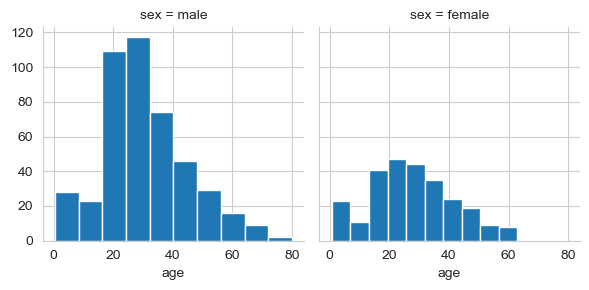

In [59]:
grid = sns.FacetGrid(data=titanic, col='sex')
grid.map(plt.hist,'age')

# Classification - predict survived / deceased

In [60]:
train = pd.read_csv('C:\\Users\\Asmita shetty\\Desktop\\Refactored_Py_DS_ML_Bootcamp-master\\13-Logistic-Regression\\titanic_train.csv')

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing Values

<Axes: >

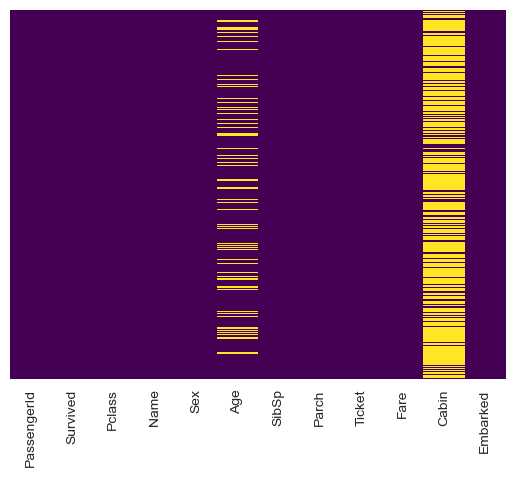

In [62]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

<Axes: xlabel='Survived', ylabel='count'>

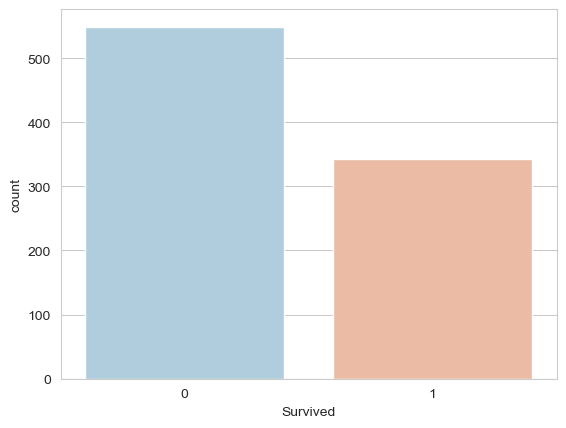

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

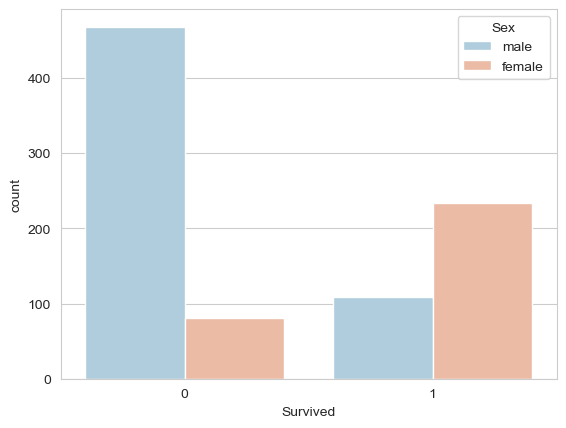

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Sex', data=train, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

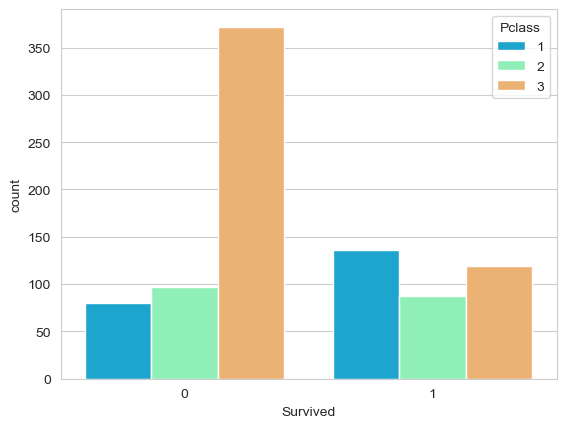

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: >

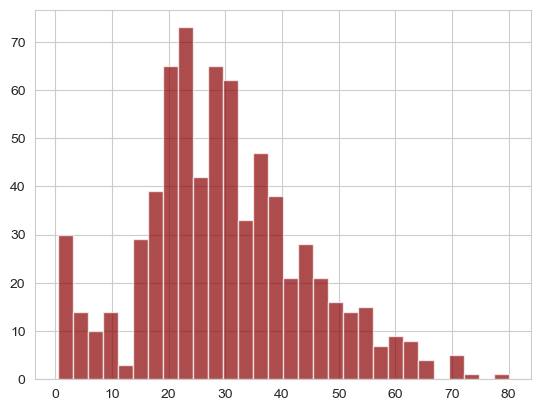

In [68]:
train['Age'].hist(bins = 30, color='darkred',alpha=0.7)

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class.

<Axes: xlabel='Pclass', ylabel='Age'>

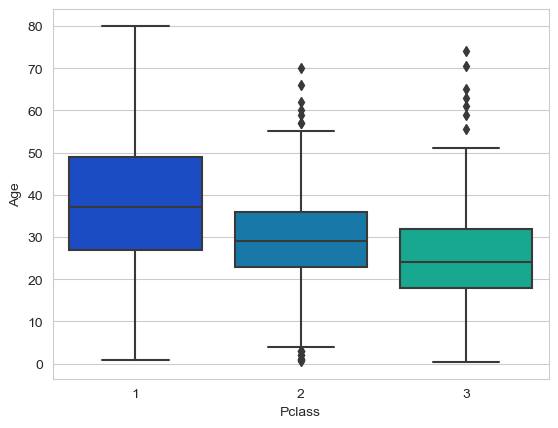

In [69]:
sns.boxplot(x='Pclass', y='Age', data = train, palette = 'winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [70]:
def impute_age(cols):
    Age = cols[0]
    PClass = cols[1]
    if pd.isnull(Age):
        if PClass == 1:
            return 37
        elif PClass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [73]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

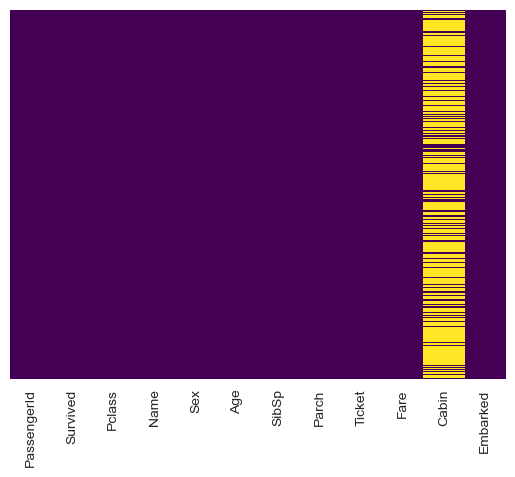

In [74]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
train.drop('Cabin',axis=1,inplace=True)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [77]:
train.dropna(inplace=True)

# Converting Categorical Features

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [79]:
sex = pd.get_dummies(train['Sex'], drop_first = True) # dropping first category to avoid multicollinearity
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [80]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [81]:
train = pd.concat([train,sex,embark],axis=1) # concatenate One Hot encoded columns with original train dataset

In [82]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

Train Test Split

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
predictions = logmodel.predict(X_test)

# Evaluation

We can check precision,recall,f1-score using classification report!

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



Precision, Recall, F1-Score, and Support for Each Class

Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. 
For Class 0, it is 0.79, meaning that 79% of the predictions made for Class 0 are correct.

Recall (or Sensitivity) is the ratio of true positive predictions to the total number of actual positives. 
For Class 0, it is 0.91, indicating that the model correctly identified 91% of the actual Class 0 instances.

The F1-Score is the harmonic mean of precision and recall. For Class 0, it is 0.85, reflecting a balance between 
precision and recall.

Class Performance: Class 0 (deceased) has a higher recall but lower precision compared to Class 1. 
    This suggests that the model is better at identifying Class 0 instances but is slightly 
    less precise when it predicts Class 0. Conversely, the model is more precise with Class 1
    but misses more true Class 1 instances.

Model Balance: The F1-Scores provide a balanced measure of performance. 
    Class 0 has a higher F1-Score than Class 1, indicating better overall performance for Class 0.

Overall Accuracy: The accuracy of 0.80 shows that the model performs reasonably well across both classes.

Averages: The macro average provides an unweighted view of performance, while the weighted average reflects
    performance while considering class imbalance (i.e., the different number of instances in each class).

Overall, the model seems to perform well, particularly in terms of overall accuracy and F1-Score. 
However, there is a trade-off between precision and recall for the two classes, which is a common 
scenario in classification problems.